import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [6]:
df = pd.read_excel('iFood.xlsx')
df.head()


,Index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall,Complain,Age,Customer_Days,marital_status,education
0,1001,58138,0,0,58,635,88,546,172,88,...,0,0,0,0,0,0,63,2822,Single,Graduation
1,1002,46344,1,1,38,11,1,6,2,1,...,0,0,0,0,0,0,66,2272,Single,Graduation
2,1003,71613,0,0,26,426,49,127,111,21,...,0,0,0,0,0,0,55,2471,Together,Graduation
3,1004,26646,1,0,26,11,4,20,10,3,...,0,0,0,0,0,0,36,2298,Together,Graduation
4,1005,58293,1,0,94,173,43,118,46,27,...,0,0,0,0,0,0,39,2320,Married,PHD


In [7]:
df.shape

(2205, 29)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                2205 non-null   int64 
 1   Income               2205 non-null   int64 
 2   Kidhome              2205 non-null   int64 
 3   Teenhome             2205 non-null   int64 
 4   Recency              2205 non-null   int64 
 5   MntWines             2205 non-null   int64 
 6   MntFruits            2205 non-null   int64 
 7   MntMeatProducts      2205 non-null   int64 
 8   MntFishProducts      2205 non-null   int64 
 9   MntSweetProducts     2205 non-null   int64 
 10  MntRegularProds      2205 non-null   int64 
 11  MntGoldProds         2205 non-null   int64 
 12  MntTotal             2205 non-null   int64 
 13  NumDealsPurchases    2205 non-null   int64 
 14  NumWebPurchases      2205 non-null   int64 
 15  NumCatalogPurchases  2205 non-null   int64 
 16  NumSto

In [9]:
df = df.drop_duplicates()
df = df[df['Income'] > 0]


In [10]:
df.describe()


,Index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmpOverall,Complain,Age,Customer_Days
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000,2205.000000,2205.000000,2205.000000
mean,2103.000000,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,...,5.336961,0.064399,0.013605,0.073923,0.074376,0.073016,0.29932,0.009070,51.095692,2512.718367
std,636.672993,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,...,2.413535,0.245518,0.115872,0.261705,0.262442,0.260222,0.68044,0.094827,11.705801,202.563647
min,1001.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,24.000000,2159.000000
25%,1552.000000,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,43.000000,2339.000000
50%,2103.000000,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.000000,2515.000000
75%,2654.000000,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,61.000000,2688.000000
max,3205.000000,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000,1.000000,80.000000,2858.000000


In [11]:
df['Total_Spending'] = (
    df['MntWines'] +
    df['MntFruits'] +
    df['MntMeatProducts'] +
    df['MntFishProducts'] +
    df['MntSweetProducts'] +
    df['MntGoldProds']
)


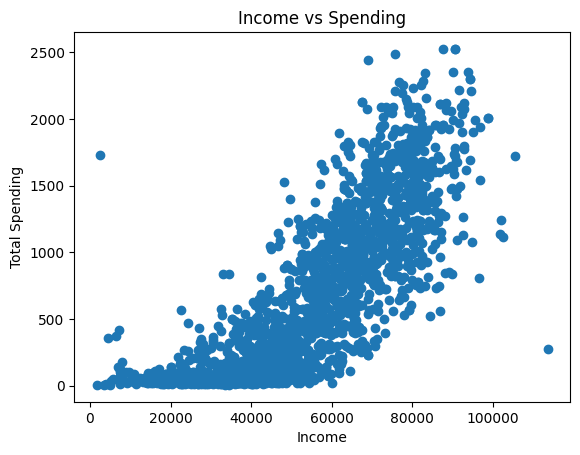

In [12]:
plt.scatter(df['Income'], df['Total_Spending'])
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Income vs Spending')
plt.show()


In [13]:
X = df[['Income', 'Total_Spending']]

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)


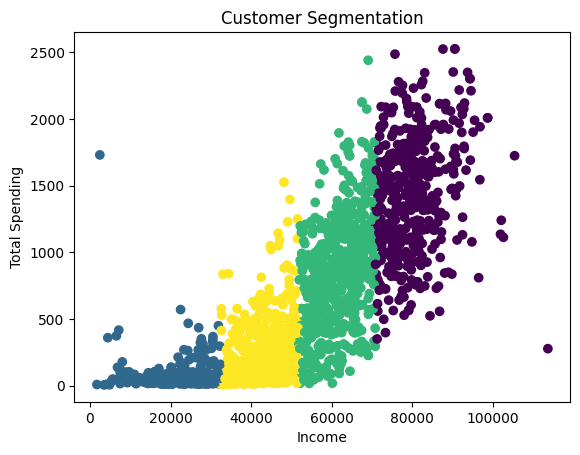

In [14]:
plt.scatter(df['Income'], df['Total_Spending'], c=df['Cluster'])
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.title('Customer Segmentation')
plt.show()


Customers were segmented into four groups based on income and spending behavior.
High-income high-spending customers represent premium users, while low-income low-spending customers are price sensitive.
These insights can help businesses design targeted marketing strategi